# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

In [163]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [164]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [165]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

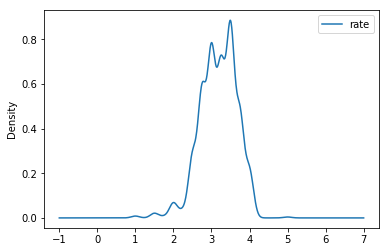

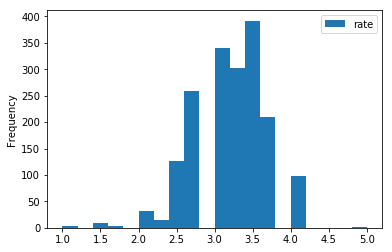

In [166]:
best_bar.plot.kde()
best_bar.plot.hist(bins = 20, density = False)
plt.show()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

In [167]:
best_bar.percent.dtype
best_bar.percent = best_bar.percent.apply(lambda a : a[:-1])
best_bar.percent = best_bar.percent.astype(float)
print(best_bar.percent)

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
5       70.0
6       70.0
7       70.0
8       70.0
9       70.0
10      70.0
11      70.0
12      70.0
13      70.0
14      70.0
15      70.0
16      70.0
17      70.0
18      70.0
19      70.0
20      63.0
21      70.0
22      63.0
23      70.0
24      70.0
25      60.0
26      80.0
27      88.0
28      72.0
29      55.0
        ... 
1765    70.0
1766    60.0
1767    70.0
1768    70.0
1769    85.0
1770    85.0
1771    70.0
1772    78.0
1773    78.0
1774    65.0
1775    68.0
1776    66.0
1777    72.0
1778    80.0
1779    72.0
1780    65.0
1781    70.0
1782    70.0
1783    62.0
1784    75.0
1785    75.0
1786    90.0
1787    70.0
1788    68.0
1789    58.0
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: percent, Length: 1795, dtype: float64


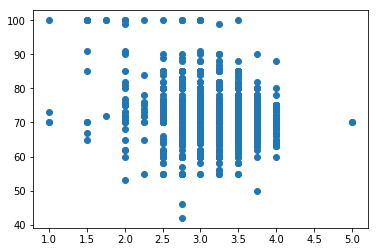

In [168]:

plt.scatter(y = best_bar.percent, x = best_bar.rate)
plt.show()

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

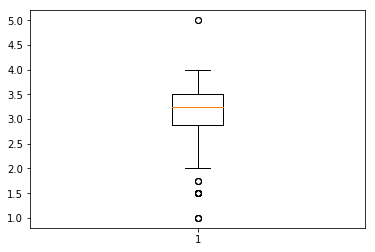

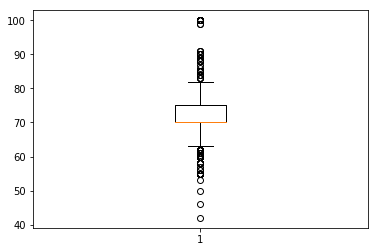

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


In [169]:
plt.boxplot(best_bar.rate)
plt.show()
plt.boxplot(best_bar.percent.astype(float))
plt.show()
best_bar.describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [170]:
countOfOrigins = pd.value_counts(best_bar.bean_orig)
print(countOfOrigins)
#best_bar.bean_orig.tail()

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
                                 73
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Costa Rica                       38
Vietnam                          38
Tanzania                         34
Ghana                            33
Trinidad                         33
Mexico                           30
Hawaii                           28
Guatemala                        28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Sao Tome                         10
Congo                       

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

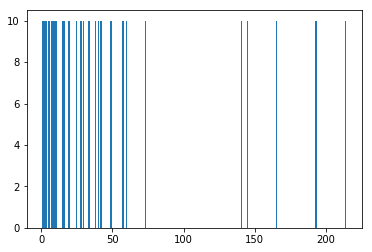

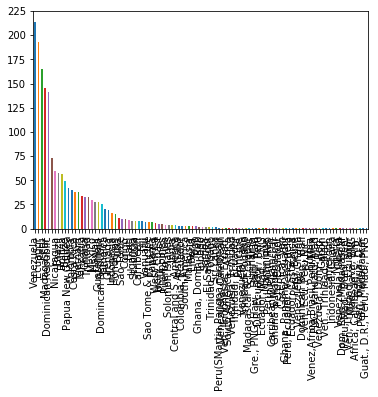

In [171]:
plt.bar(countOfOrigins, height = 10)
plt.show()
countOfOrigins.plot(kind = 'bar')

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [172]:
best_bar.bean_orig.dropna(axis = 0, how =  all)

0                 Sao Tome
1                     Togo
2                     Togo
3                     Togo
4                     Peru
5                Venezuela
6                     Cuba
7                Venezuela
8                Venezuela
9                     Peru
10                  Panama
11              Madagascar
12                  Brazil
13                 Ecuador
14                Colombia
15                   Burma
16        Papua New Guinea
17               Venezuela
18                    Peru
19                    Peru
20                    Peru
21                 Bolivia
22                    Peru
23                    Peru
24                    Peru
25                    Fiji
26                    Fiji
27                    Fiji
28                    Fiji
29                 Ecuador
               ...        
1765                Belize
1766                      
1767            Madagascar
1768               Ecuador
1769              Trinidad
1770              Tanzania
1

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [173]:
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [174]:
WithoutSpaces = best_bar['bean_orig'] != '\xa0'
uniq = best_bar.bean_orig[WithoutSpaces].unique()
best_bar.bean_orig[WithoutSpaces].value_counts() 

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Costa Rica                       38
Vietnam                          38
Tanzania                         34
Trinidad                         33
Ghana                            33
Mexico                           30
Hawaii                           28
Guatemala                        28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Sao Tome                         10
Congo                            10
Haiti                       

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [175]:
# если я хочу убрать ВСЕ батончики которых МЕНЬШЕ 5
data = best_bar[WithoutSpaces]
counts = data.bean_orig.value_counts()
origins = data.bean_orig.value_counts().keys()

def ff(a):
        c = 0
        for i in range(len(counts)):
            if(origins[i] == a):
                if (counts[i] >= 5):
                    return a
                else:
                    a = 'Complex'
                    return a
comp = pd.Series(map(ff, data.bean_orig))
#print(comp)
comp.value_counts()


Venezuela              214
Ecuador                193
Peru                   165
Madagascar             145
Dominican Republic     141
Complex                 91
Nicaragua               60
Brazil                  58
Bolivia                 57
Belize                  49
Papua New Guinea        42
Colombia                40
Vietnam                 38
Costa Rica              38
Tanzania                34
Ghana                   33
Trinidad                33
Mexico                  30
Guatemala               28
Hawaii                  28
Domincan Republic       25
Jamaica                 20
Grenada                 19
Indonesia               16
Honduras                15
Cuba                    11
Sao Tome                10
Congo                   10
Haiti                    9
Uganda                   8
Carribean                8
St. Lucia                8
Fiji                     8
Vanuatu                  7
Sao Tome & Principe      7
Panama                   7
West Africa              6
I

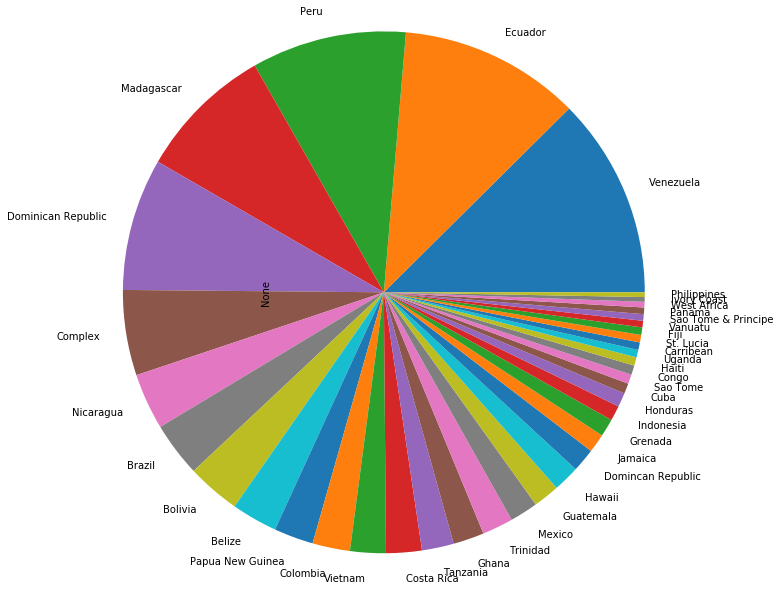

In [176]:
comp.value_counts().plot.pie(radius = 3)
plt.show()

## Попарные графики распределений

In [177]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

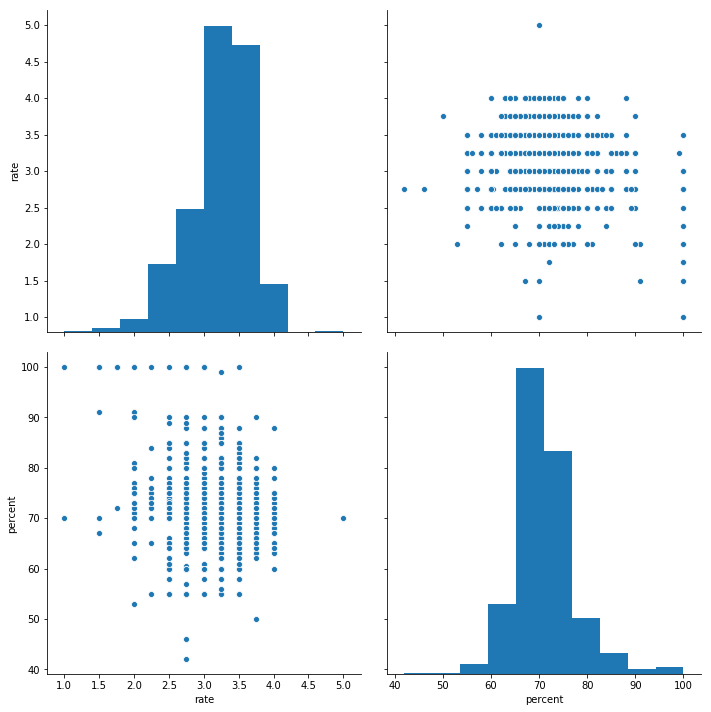

In [178]:
best_bar.percent.astype(np.float)
col = ['bean_orig', 'rate', 'company_loc', 'percent']
#best_bar[WithoutSpaces]
pairplot(best_bar[WithoutSpaces][col], height = 5)


Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [179]:
rate = best_bar.rate
origins = best_bar.bean_orig
values = {}

for i in range(len(origins)):
    for j in comp.unique():
        if (origins[i] == j):
            if j in values.keys():
                values[j].append(rate[i])
            else: 
                values.update({j:[]})
                values[j].append(rate[i])
#print(values)
MidVal = 0
Medn = 0
def median(l):
    half = len(l) // 2
    l.sort()
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]
overalMidVal = {}
overalMedn = {}
for i in values.keys():   
    MidVal = np.mean(values.get(i))
    Medn = median(values.get(i))
    overalMidVal.update({MidVal: i})
    overalMedn.update({Medn: i})
    print('Страна:', i, 'Срзнач:', MidVal, 'Медиана:', Medn)
#print(sorted(overal.items()))

Страна: Sao Tome Срзнач: 3.175 Медиана: 3.125
Страна: Peru Срзнач: 3.1378787878787877 Медиана: 3.25
Страна: Venezuela Срзнач: 3.2453271028037385 Медиана: 3.25
Страна: Cuba Срзнач: 3.25 Медиана: 3.25
Страна: Panama Срзнач: 3.1785714285714284 Медиана: 3.25
Страна: Madagascar Срзнач: 3.2655172413793103 Медиана: 3.25
Страна: Brazil Срзнач: 3.2844827586206895 Медиана: 3.375
Страна: Ecuador Срзнач: 3.134715025906736 Медиана: 3.25
Страна: Colombia Срзнач: 3.225 Медиана: 3.25
Страна: Papua New Guinea Срзнач: 3.2916666666666665 Медиана: 3.25
Страна: Bolivia Срзнач: 3.1973684210526314 Медиана: 3.25
Страна: Fiji Срзнач: 3.125 Медиана: 3.25
Страна: Mexico Срзнач: 3.0083333333333333 Медиана: 3.0
Страна: Indonesia Срзнач: 3.1875 Медиана: 3.25
Страна: Trinidad Срзнач: 3.2045454545454546 Медиана: 3.25
Страна: Vietnam Срзнач: 3.3157894736842106 Медиана: 3.375
Страна: Nicaragua Срзнач: 3.2 Медиана: 3.25
Страна: Tanzania Срзнач: 3.2058823529411766 Медиана: 3.25
Страна: Dominican Republic Срзнач: 3.209219

In [180]:
print('Лучшие батончики по среднему рейтингу из следующих стран:', '1.',sorted(overalMidVal.items())[len(overalMidVal.items())-1], '2.', sorted(overalMidVal.items())[len(overalMidVal.items())-2], '3.',sorted(overalMidVal.items())[len(overalMidVal.items())-3])
print('Лучшие батончики по медиане из следующих стран:', '1.',sorted(overalMedn.items())[len(overalMedn.items())-1], '2.', sorted(overalMedn.items())[len(overalMedn.items())-2], '3.',sorted(overalMedn.items())[len(overalMedn.items())-3])

Лучшие батончики по среднему рейтингу из следующих стран: 1. (3.388888888888889, 'Haiti') 2. (3.35, 'Honduras') 3. (3.325, 'Congo')
Лучшие батончики по медиане из следующих стран: 1. (3.5, 'Sao Tome & Principe') 2. (3.375, 'Congo') 3. (3.25, 'Hawaii')


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.